# Practical - 4 : Analyze LinkedIn job postings using TF-IDF to identify in-demand skills.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
skills = pd.read_csv('/content/job_skills.csv')

In [ ]:
skills = skills.dropna(subset=['skill_abr'])

skills['skill_abr'] = skills['skill_abr'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=None, max_df=0.8, min_df=10, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(skills['skill_abr'])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

tfidf_df = pd.DataFrame({'term': feature_names, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

<Axes: ylabel='skill_abr'>

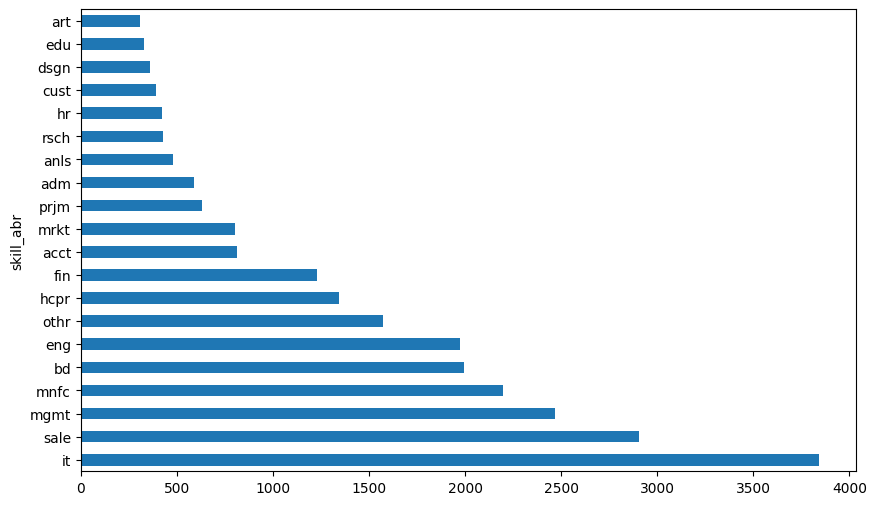

In [ ]:
skills['skill_abr'].value_counts().head(20).plot(kind='barh', figsize=(10, 6))

In [ ]:
top_n = 30
top_tfidf = tfidf_df.sort_values(by='score', ascending=False).head(top_n)

print("Top", top_n, "In-Demand Skills by TF-IDF Score:\n")
print(top_tfidf.to_string(index=False))

Top 30 In-Demand Skills by TF-IDF Score:

term  score
  it 3841.0
sale 2904.0
mgmt 2467.0
mnfc 2195.0
  bd 1993.0
 eng 1974.0
othr 1574.0
hcpr 1346.0
 fin 1227.0
acct  813.0
mrkt  802.0
prjm  630.0
 adm  589.0
anls  479.0
rsch  430.0
  hr  421.0
cust  393.0
dsgn  358.0
 edu  331.0
 art  310.0
 lgl  286.0
cnsl  284.0
genb  245.0
  pr  237.0
 wrt  233.0
  qa  229.0
advr  221.0
stra  203.0
trng  188.0
supl  186.0
